# Importing data
## Orbital Parameters
We obtain the Laskar data from the website http://vo.imcce.fr/insola/earth/online/earth/online/index.php also linked to on absalon

We obtain the Berger data from the website https://www.ncei.noaa.gov/pub/data/paleo/climate_forcing/orbital_variations/insolation/ where the data from the Berger paper sited in the paper is found. We also slice the data from 875 kyrs ago (at the insolation minimum mentioned in the paper) until present

In [248]:
import numpy as np
laskar = np.genfromtxt('laskar_orbital_data.txt')
laskar_time = laskar[:, 0] # in Julian yrs = 365.25 days
laskar_ecce = laskar[:, 1]
laskar_prec = laskar[:, 2]
laskar_obli = laskar[:, 3]
laskar_inso = laskar[:, 4]

berger = np.genfromtxt('berger_orbital_data.txt', skip_header=2)[::-1]
berger_time = berger[:, 0]
berger_ecce = berger[:, 1]
berger_obli = berger[:, 3]    
berger_prec = berger[:, 4]
berger_inso = berger[:, 5]


Slicing the data until 876 kyr and 2000 kyr before the present. (The reason we slice until 874 kyrs, is because the LR04 data below doesn't have a data point for 875 kyr.)

In [249]:
SL_876 = np.where(-876 <= laskar_time)[0] # slice the data from 876 kyrs ago until present 
laskar_time_876 = laskar_time[SL_876]
laskar_inso_876 = laskar_inso[SL_876]
laskar_ecce_876 = laskar_ecce[SL_876]
laskar_obli_876 = laskar_obli[SL_876]
laskar_prec_876 = laskar_prec[SL_876]

SL_2000 = np.where(-2000 <= laskar_time)[0] # slice the data from 2000 kyrs ago until present 
laskar_time_2000 = laskar_time[SL_2000]
laskar_inso_2000 = laskar_inso[SL_2000]
laskar_ecce_2000 = laskar_ecce[SL_2000]
laskar_obli_2000 = laskar_obli[SL_2000]
laskar_prec_2000 = laskar_prec[SL_2000]

SB_876 = np.where(-876 <= berger_time)[0] # slice the data from 876 kyrs ago until present 
berger_time_876 = berger_time[SB_876]
berger_inso_876 = berger_inso[SB_876]
berger_ecce_876 = berger_ecce[SB_876]
berger_obli_876 = berger_obli[SB_876]
berger_prec_876 = berger_prec[SB_876]

SB_2000 = np.where(-2000 <= berger_time)[0] # slice the data from 2000 kyrs ago until present 
berger_time_2000 = berger_time[SB_2000]
berger_inso_2000 = berger_inso[SB_2000]
berger_ecce_2000 = berger_ecce[SB_2000]
berger_obli_2000 = berger_obli[SB_2000]
berger_prec_2000 = berger_prec[SB_2000]

## The LR04 $\delta^{18}\mathrm{O}$ data

In [250]:
LR04record = np.genfromtxt('LR04record.txt', dtype=float)
LR04_time = -LR04record[:,0]/1000
LR04_iso = LR04record[:,1]

SLR_876 = np.where(-876 <= LR04_time)[0]
LR04_876 = LR04record[SLR_876]
LR04_time_876 = LR04_time[SLR_876]
LR04_iso_876 = LR04_iso[SLR_876]

SLR_2000 = np.where(-2000 <= LR04_time)[0]
LR04_2000 = LR04record[SLR_2000]
LR04_time_2000 = LR04_time[SLR_2000]
LR04_iso_2000 = LR04_iso[SLR_2000]


In [251]:
EDCrecord = np.genfromtxt('EDCrecord.txt', dtype=float)
EDC_time = -EDCrecord[:,0]/1000
EDC_iso = EDCrecord[:,1]

SEDC_876 = np.where(-876 <= EDC_time)[0]
EDC_876 = EDCrecord[SEDC_876]
EDC_time_876 = EDC_time[SEDC_876]
EDC_iso_876 = EDC_iso[SEDC_876]

SEDC_2000 = np.where(-2000 <= EDC_time)[0]
EDC_2000 = EDCrecord[SEDC_2000]
EDC_time_2000 = EDC_time[SEDC_2000]
EDC_iso_2000 = EDC_iso[SEDC_2000]

We normalize the insolation as in the paper by paillard to have mean 0 and unity variance. We do this by subtracting the mean $\mu$ from all the $N$ data points, and then dividing everything by the standard deviation $$\sigma = \sqrt{\frac{\sum (X - \mu)^2}{N}}$$

In [252]:
μ = np.mean(laskar_inso_876)
σ = np.std(laskar_inso_876)
print(f'The mean insolation of LASKAR insolation is μ = {μ.round(2)} W/m^2 and standard deviation is σ = {σ.round(2)} W/m^2.')
i0 = -0.75; i1 = i2 = 0; i3 = 1
i0u = μ + i0*σ; i1u = μ + i1*σ; i2u = μ + i2*σ; i3u = μ + i3*σ
print(f'i0u = {i0u.round(2)} W/m^2, i1u = {i1u.round(2)} W/m^2, i2u = {i2u.round(2)} W/m^2, i3u = {i3u.round(2)} W/m^2')

μ = np.mean(berger_inso_876)
σ = np.std(berger_inso_876)
print(f'The mean insolation of BERGER insolation is μ = {μ.round(2)} W/m^2 and standard deviation is σ = {σ.round(2)} W/m^2.')
i0 = -0.75; i1 = i2 = 0; i3 = 1

i0u = μ + i0*σ; i1u = μ + i1*σ; i2u = μ + i2*σ; i3u = μ + i3*σ
print(f'i0u = {i0u.round(2)} W/m^2, i1u = {i1u.round(2)} W/m^2, i2u = {i2u.round(2)} W/m^2, i3u = {i3u.round(2)} W/m^2')

The mean insolation of LASKAR insolation is μ = 475.34 W/m^2 and standard deviation is σ = 18.3 W/m^2.
i0u = 461.62 W/m^2, i1u = 475.34 W/m^2, i2u = 475.34 W/m^2, i3u = 493.64 W/m^2
The mean insolation of BERGER insolation is μ = 440.42 W/m^2 and standard deviation is σ = 19.77 W/m^2.
i0u = 425.59 W/m^2, i1u = 440.42 W/m^2, i2u = 440.42 W/m^2, i3u = 460.19 W/m^2


In [253]:
def normalize(input):
    data = input.copy()
    mean = np.mean(data)
    std = np.sqrt(np.sum((data - mean)**2)/len(data))
    data -= mean
    data = data/std
    return data

In [254]:
berger_ecce_876n = normalize(berger_ecce_876)
berger_obli_876n = normalize(berger_obli_876)
berger_prec_876n = normalize(berger_prec_876)
berger_inso_876n = normalize(berger_inso_876)

laskar_ecce_876n = normalize(laskar_ecce_876)
laskar_obli_876n = normalize(laskar_obli_876)
laskar_prec_876n = normalize(laskar_prec_876)
laskar_inso_876n = normalize(laskar_inso_876)

LR04_iso_876n = normalize(LR04_iso_876)
EDC_iso_876n = normalize(EDC_iso_876)

# Plotting data

In [255]:
import matplotlib.pyplot as plt
plt.rcParams['font.family']='serif'
plt.rcParams['lines.linewidth']= 0.8


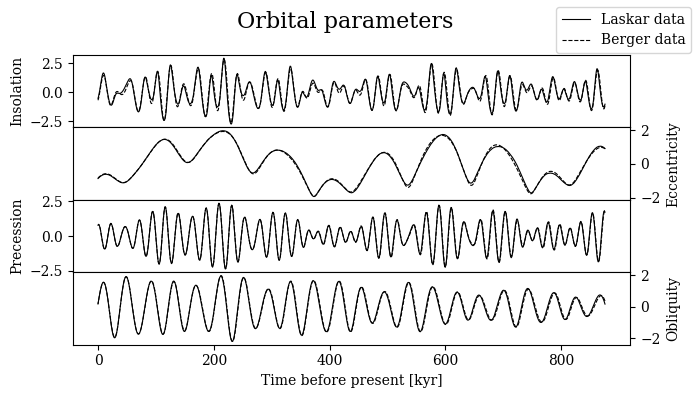

In [256]:
gs = dict(hspace=0)
fig, axs = plt.subplots(4, 1, figsize = (7, 4), sharex=True, gridspec_kw = gs)
fig.suptitle('Orbital parameters', fontsize=16)

axs[0].plot(-laskar_time_876, laskar_inso_876n, 'k')
axs[0].plot(-berger_time_876, berger_inso_876n, 'k--')
axs[0].set_ylabel('Insolation')

axs[1].plot(-laskar_time_876, laskar_ecce_876n, 'k')
axs[1].plot(-berger_time_876, berger_ecce_876n, 'k--')
axs[1].yaxis.set_label_position("right")
axs[1].yaxis.tick_right()
axs[1].set_ylabel('Eccentricity')

axs[2].plot(-laskar_time_876, laskar_prec_876n, 'k')
axs[2].plot(-berger_time_876, berger_prec_876n, 'k--')
axs[2].set_ylabel('Precession')

axs[3].plot(-laskar_time_876, laskar_obli_876n, 'k')
axs[3].plot(-berger_time_876, berger_obli_876n, 'k--')
axs[3].yaxis.set_label_position("right")
axs[3].yaxis.tick_right()
axs[3].set_ylabel('Obliquity')
axs[3].set_xlabel('Time before present [kyr]')

line_laskar  = plt.Line2D([0], [0], label='Laskar data', color='k')
line_berger  = plt.Line2D([0], [0], label='Berger data', color='k', ls='--')
lines = [line_laskar, line_berger]
labels = [line.get_label() for line in lines]
fig.legend(lines, labels)
fig.tight_layout()
fig.savefig('orbital_parameters.png', dpi=300)


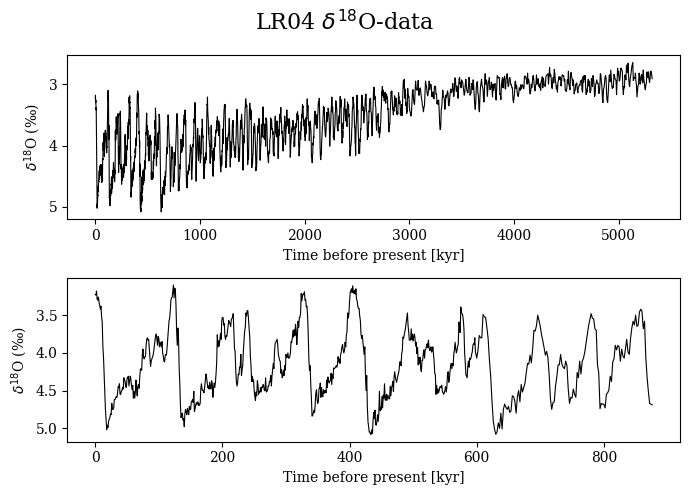

In [257]:
fig, axs = plt.subplots(2,1, figsize = (7, 5))

fig.suptitle('LR04 $δ^{18}$O-data', fontsize=16)
axs[0].plot(-LR04_time, LR04_iso, 'k', lw = 0.8)
axs[0].set_ylim(axs[0].get_ylim()[::-1])
axs[0].set_xlabel('Time before present [kyr]')
axs[0].set_ylabel('$\delta^{18}$O (‰)')

axs[1].plot(-LR04_time_876, LR04_iso_876, 'k', lw = 0.8)
axs[1].set_ylim(axs[1].get_ylim()[::-1])
axs[1].set_xlabel('Time before present [kyr]')
axs[1].set_ylabel('$\delta^{18}$O (‰)')

fig.tight_layout()
fig.savefig('LR04_data.png', dpi=300)


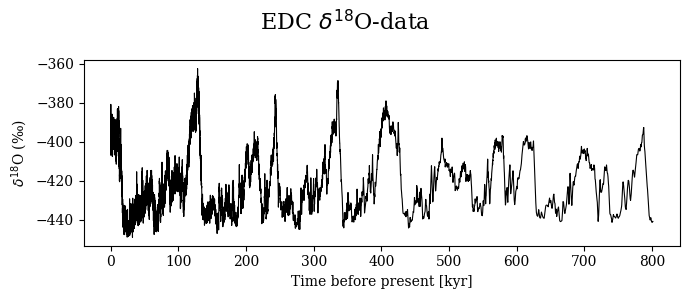

In [258]:
gs = dict(hspace=0)
fig, axs = plt.subplots(1,1, figsize = (7, 3), sharex=True, gridspec_kw = gs)

fig.suptitle('EDC $δ^{18}$O-data', fontsize=16)
axs.plot(-EDC_time, EDC_iso, 'k', lw = 0.8)
axs.set_xlabel('Time before present [kyr]')
axs.set_ylabel('$\delta^{18}$O (‰)')

fig.tight_layout()
fig.savefig('EDC_data.png', dpi=300)

In [259]:
from scipy.signal import find_peaks, spectrogram
# Function that calculates the truncation function for the forcing
def f(x, a = 1):
    f = 1/2 * (x + np.sqrt(4 * a**2 + x**2))
    return f

def create_peaks_arr(data):
    peak_ids = find_peaks(data)[0]
    peak_vals = data[peak_ids]
    peak_ids = peak_ids
    peak_vals = peak_vals
    peaks_arr = np.array([peak_ids, peak_vals])
    return peaks_arr

def find_latest_peak_idx(t, peaks_arr):
    peak_ids = peaks_arr[0]
    ids = peak_ids - t
    N = np.where(ids < 0)
    if len(ids[N]) != 0:
        prev_peak_idx = int(ids[N][-1]) + t
    else:
        prev_peak_idx = None
    return prev_peak_idx

In [260]:
def update_state_model1(time_since_state_change, insolation, previous_insolation, prev_peak_val, old_state, i0, i1, i2, i3, tg):
    new_state = old_state
    #i to g transition if insolation is less than i0 and the previous insolation was greater than i0
    if old_state == 2 and insolation < i0 and previous_insolation > i0:
        new_state = 1
    #g to G transition if the time since last state change is greater than ice sheet growth time tg AND if the insolation is less than i2
    elif old_state == 1 and time_since_state_change > tg and insolation < i2 and previous_insolation >= i2:
        if prev_peak_val < i3 or prev_peak_val == None:
            new_state = 0
    # G to i transition if the insolation is above i1
    elif old_state == 0 and insolation > i1:
        new_state = 2
    return new_state

def paillard_model1(time_data, inso_data, init_state, i0, i1, i2, i3, tg):
    state_array = np.array([]) #Empty array to hold the climate states
    state_array = np.append(state_array, init_state)
    
    peaks_arr = create_peaks_arr(inso_data) #create an array of the peaks of the insolation data
    t_steps = len(time_data) # How many time steps to loop over

    time_since_state_change = 0 
    old_state = init_state #setting the initial_state
    for t in range(1, t_steps): #loop over all but one time step since we appended the initial state and the sizes of the data for plotting will get messy
        insolation = inso_data[t]
        previous_insolation = inso_data[t - 1]
        prev_peak_idx = find_latest_peak_idx(t, peaks_arr)
        prev_peak_val = inso_data[prev_peak_idx]
        new_state = update_state_model1(time_since_state_change, insolation, previous_insolation, prev_peak_val, old_state, i0, i1, i2, i3, tg) #update the model state given the model parameters
        state_array = np.append(state_array, new_state)
        
        time_since_state_change += 1 #increment time since last change 
        if old_state != new_state: #check whether the state was changed and set the time accordingly
            time_since_state_change = 0
        
        old_state = new_state #resetting for new loop
    return state_array

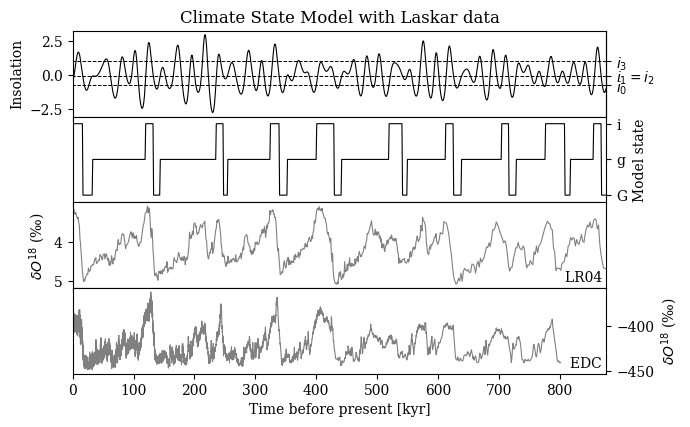

In [261]:
init_state = 0; i0=-0.75; i1=-0.08; i2=i1; i3=1; tg=33
states = paillard_model1(laskar_time_876, laskar_inso_876n, init_state, i0, i1, i2, i3, tg)

plt.rcParams['figure.figsize'] = (7,5*7/8)
gs = dict(hspace=0)
fig, axs = plt.subplots(4,1, sharex=True, gridspec_kw = gs)

Os = np.zeros_like(laskar_time_876)

axs[0].set_title('Climate State Model with Laskar data')
axs[0].plot(-laskar_time_876, Os + i3, 'k--', lw=0.7)
axs[0].plot(-laskar_time_876, Os + i1, 'k--', lw=0.7)
axs[0].plot(-laskar_time_876, Os + i0, 'k--', lw=0.7)
axs[0].plot(-laskar_time_876, laskar_inso_876n, 'k')
yticks = [i0, i1, i3]
ylabels = [f'$i_0$', f'$i_1 = i_2$', '$i_3$']
ax_r = axs[0].secondary_yaxis('right')
ax_r.set_yticks(yticks,ylabels)
axs[0].set_ylabel('Insolation')

axs[1].plot(-laskar_time_876, states, 'k')
yticks = [0, 1, 2]
ylabels = ['G', 'g', 'i']
axs[1].set_yticks(yticks,ylabels)
axs[1].yaxis.set_label_position("right")
axs[1].yaxis.tick_right()
axs[1].set_ylabel('Model state')
axs[1].set_xlim(0,len(laskar_time_876))
axs[1].set_ylim(-0.2, 2.2)

axs[2].set_title('LR04 ', loc='right', y = -0.02, fontsize = 10)
axs[2].set_ylabel('$\delta O^{18}$ (‰)')
axs[2].plot(-LR04_time_876, LR04_iso_876, 'grey', label='LR04')
axs[2].set_ylim(axs[2].get_ylim()[::-1])
# axs[2].set_xlabel('Time before present [kyr]')

axs[3].set_title('EDC ', loc='right', y = -0.02, fontsize = 10)
axs[3].plot(-EDC_time_876, EDC_iso_876, 'grey', label='LR04')
axs[3].set_xlabel('Time before present [kyr]')
axs[3].yaxis.set_label_position("right")
axs[3].yaxis.tick_right()
axs[3].set_ylabel('$\delta O^{18}$ (‰)')

fig.tight_layout()
fig.savefig('paillard_model1_laskar_tweaked.png', dpi=300)

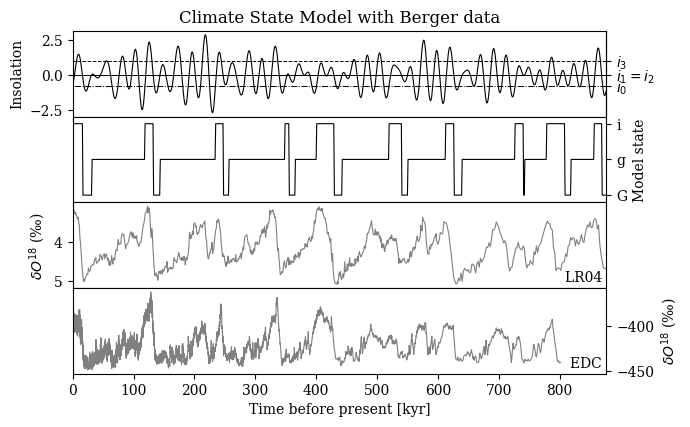

In [262]:
init_state = 0; i0=-0.75; i1=0; i2=0; i3=1; tg=33
states = paillard_model1(berger_time_876, berger_inso_876n, init_state, i0, i1, i2, i3, tg)

gs = dict(hspace=0)
fig, axs = plt.subplots(4,1, sharex=True, gridspec_kw = gs)
Os = np.zeros_like(berger_time_876)

yticks = [i0, i1, i3]
ylabels = [f'$i_0$', f'$i_1 = i_2$', '$i_3$']
ax_r = axs[0].secondary_yaxis('right')
ax_r.set_yticks(yticks,ylabels)
axs[0].set_title('Climate State Model with Berger data')
axs[0].plot(-berger_time_876, Os + i3, 'k--', lw=0.7)
axs[0].plot(-berger_time_876, Os + i1, 'k-', lw=0.7)
axs[0].plot(-berger_time_876, Os + i0, 'k-.', lw=0.7)
axs[0].plot(-berger_time_876, berger_inso_876n, 'k')
axs[0].set_ylabel('Insolation')

yticks = [0, 1, 2]
ylabels = ['G', 'g', 'i']
axs[1].plot(-berger_time_876, states, 'k')
axs[1].set_yticks(yticks,ylabels)
axs[1].yaxis.set_label_position("right")
axs[1].yaxis.tick_right()
axs[1].set_ylabel('Model state')
axs[1].set_xlim(0,len(berger_time_876))
axs[1].set_ylim(-0.2, 2.2)

axs[2].set_title('LR04 ', loc='right', y = -0.02, fontsize = 10)
axs[2].set_ylabel('$\delta O^{18}$ (‰)')
axs[2].plot(-LR04_time_876, LR04_iso_876, 'grey', label='LR04')
axs[2].set_ylim(axs[2].get_ylim()[::-1])
axs[2].set_xlabel('Time before present [kyr]')

axs[3].set_title('EDC ', loc='right', y = -0.02, fontsize = 10)
axs[3].plot(-EDC_time_876, EDC_iso_876, 'grey', label='LR04')
axs[3].set_xlabel('Time before present [kyr]')
axs[3].yaxis.set_label_position("right")
axs[3].yaxis.tick_right()
axs[3].set_ylabel('$\delta O^{18}$ (‰)')

fig.tight_layout()
fig.savefig('paillard_model1_berger.png', dpi=300)

Trying to implement model 2. The change in ice sheet volume is described by

$$\frac{d v}{dt} = \frac{v_\text{R} - v(t)}{\tau_\text{R}} - \frac{F}{\tau_\text{F}},$$

where $v$ is the ice volume, $R$ is the current climate regime $\left(R = \mathbf i, \mathbf g, \mathbf G\right)$, $v_R$ are the reference ice volumes for the different regimes, $F$ is the forcing, $t_R$ and $t_F$ are time constants. The ice volume is normalized to unity: $v_g = v_G = v_\text{max} = 1, v_i = 0$.

In [263]:
# differential function for use in RK4
def ice_vol_diff(F, vR, τR, τF, dt):
    def dvdt(v, t):
        return ((vR - v)/τR - F/τF) * dt
    return dvdt

In [264]:
def RK4_step(df, v, t, dt):
    k1 = df(v, t)
    k2 = df(v + 0.5*dt*k1, t + 0.5*dt)
    k3 = df(v + 0.5*dt*k1, t + 0.5*dt)
    k4 = df(v + dt*k2, t + dt)
    v = v + (1/6)*dt*(k1 + 2*k2 + 2*k3 + k4)
    return v
    
def RK4(df, v0, dt, tmax):    
    # Loop
    N_t = int(round(tmax/dt))
    pop_arr = [v0] # array to hold all the solution
    tt = np.linspace(0, N_t*dt, N_t)
    v = v0
    for t in tt:
        v = RK4_step(df, v, t, dt)
        pop_arr.append(v)
    return np.array(pop_arr)

In [265]:
def update_state_model2(old_state, v, vmax, insolation, i0, i1):
    # i state = 2
    # g state = 1
    # G state = 0
    
    new_state = old_state
    #i to g transition is insolation is less than i0
    if old_state == 2 and insolation < i0:
        new_state = 1
    #g to G transition if the ice volume 
    elif old_state == 1 and v > vmax:
        new_state = 0
    # G to i transition if the insolation is above i1
    elif old_state == 0 and insolation > i1:
        new_state = 2
    return new_state

def paillard_model2(inso_data, init_state, v0, vmax, i0, i1):
    τF = 25
    dt = 1
    
    # Array with constants τR and vR for the given climate regime R 
    i_state = np.array([10, 0])
    g_state = np.array([50, 1])
    G_state = np.array([50, 1])
    state_vals = np.array([G_state, g_state, i_state])
    
    # Calculating and normalizing forcing data
    F_data = f(inso_data)
    F_data = normalize(F_data)
    
    # Initializing variables for looping
    ice_volume_arr = np.array([v0])
    state_arr = np.array([init_state])
    vp = v0
    old_state = init_state
    t = 0
    for i in range(len(inso_data) - 1): #looping over all but one data point
        τR, vR = state_vals[old_state] #taking regime constants from state_vals array
        F = F_data[i]
        dvdt = ice_vol_diff(F, vR, τR, τF, dt)
        v = RK4_step(dvdt, vp, t, dt) #calculating new ice volume
        new_state = update_state_model2(old_state, v, vmax, inso_data[i], i0, i1) #updating climate model state
        
        #appending data
        ice_volume_arr = np.append(ice_volume_arr, v)
        state_arr = np.append(state_arr, new_state)
        
        #Resetting for new loop
        old_state = new_state
        vp = v
        t+=dt
    return ice_volume_arr, state_arr

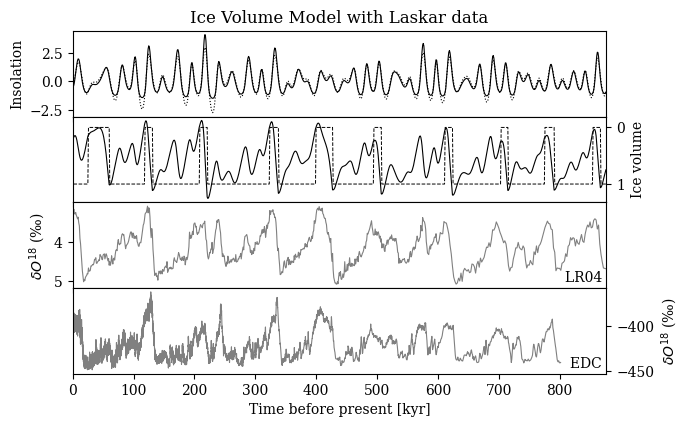

In [266]:
# Calculating and normalizing forcing data
laskar_F_876 = f(laskar_inso_876n, a = 1)
laskar_F_876n = normalize(laskar_F_876)

# Setting parameters and running model 2
init_state = 1; v0 = 0.75; vmax = 1; i0=-0.75; i1=0
ice_vol_arr, state_arr = paillard_model2(laskar_inso_876n, init_state, v0, vmax, i0, i1)

# Creating array to hold the vRs for the simulation
vR = np.array([1, 1, 0])
vR_arr = vR[state_arr]

# Plotting with flipped time as is customary in climate physics
gs = dict(hspace=0)
fig, axs = plt.subplots(4, 1, sharex=True, gridspec_kw = gs)
axs[0].plot(-laskar_time_876, laskar_F_876n, 'k')
axs[0].plot(-laskar_time_876, laskar_inso_876n, 'k:', lw=0.8)
axs[0].set_xlim(0, len(laskar_inso_876))
axs[0].set_ylabel('Insolation')
axs[0].set_title('Ice Volume Model with Laskar data')

axs[1].plot(-laskar_time_876, vR_arr, 'k--', lw = 0.7)
axs[1].plot(-laskar_time_876, ice_vol_arr, 'k')
axs[1].yaxis.set_label_position("right")
axs[1].yaxis.tick_right()
axs[1].tick_params(left=False, labelleft=False)
# axs[1].set_ylim(-0.4, 1.4)
axs[1].set_ylim(axs[1].get_ylim()[::-1])
axs[1].set_ylabel('Ice volume')

axs[2].set_title('LR04 ', loc='right', y = -0.02, fontsize = 10)
axs[2].set_ylabel('$\delta O^{18}$ (‰)')
axs[2].plot(-LR04_time_876, LR04_iso_876, 'grey', label='LR04')
axs[2].set_ylim(axs[2].get_ylim()[::-1])
axs[2].set_xlabel('Time before present [kyr]')

axs[3].set_title('EDC ', loc='right', y = -0.02, fontsize = 10)
axs[3].plot(-EDC_time_876, EDC_iso_876, 'grey', label='LR04')
axs[3].yaxis.set_label_position("right")
axs[3].yaxis.tick_right()
axs[3].set_ylabel('$\delta O^{18}$ (‰)')
axs[3].set_xlabel('Time before present [kyr]')

fig.tight_layout()
fig.savefig('paillard_model2_laskar.png', dpi=300)
# fig.savefig('paillard_model2_laskar_tweaked.png', dpi=300)

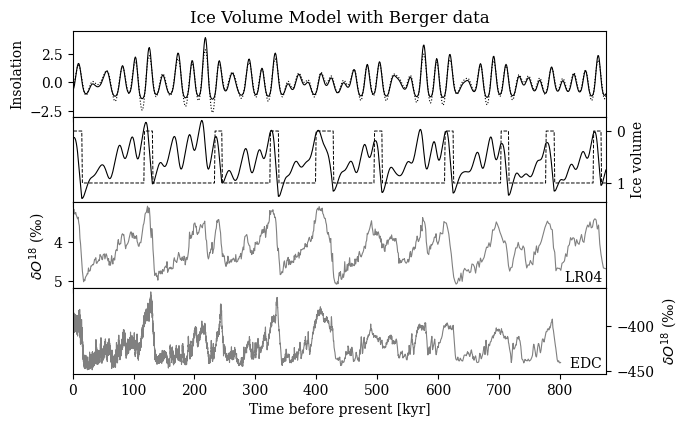

In [267]:
# Calculating and normalizing forcing data
berger_F_876 = f(berger_inso_876n, a = 1)
berger_F_876n = normalize(berger_F_876)

# Setting parameters and running model 2
init_state = 1; v0 = 0.75; vmax = 1; i0=-0.75; i1=0
ice_vol_arr, state_arr = paillard_model2(berger_inso_876n, init_state, v0, vmax, i0, i1)

# Creating array to hold the vRs for the simulation
vR = np.array([1,1,0])
vR_arr = vR[state_arr]

# Plotting with flipped time as is customary in climate physics
gs = dict(hspace=0)
fig, axs = plt.subplots(4, 1, sharex=True, gridspec_kw = gs)
axs[0].plot(-berger_time_876, berger_F_876n, 'k')
axs[0].plot(-berger_time_876, berger_inso_876n, 'k:')
axs[0].set_xlim(0, len(berger_inso_876))
axs[0].set_ylim(-3, 4.5)
axs[0].set_ylabel('Insolation')
axs[0].set_title('Ice Volume Model with Berger data')
# axs[0].tick_params(left=False, labelleft=False)

axs[1].plot(-berger_time_876, vR_arr, 'k--', lw = 0.7)
axs[1].plot(-berger_time_876, ice_vol_arr, 'k')
axs[1].yaxis.set_label_position("right")
axs[1].yaxis.tick_right()
# axs[1].set_ylim(-0.4, 1.4)
axs[1].set_ylim(axs[1].get_ylim()[::-1])
axs[1].set_ylabel('Ice volume')

axs[2].set_title('LR04 ', loc='right', y = -0.02, fontsize = 10)
axs[2].set_ylabel('$\delta O^{18}$ (‰)')
axs[2].plot(-LR04_time_876, LR04_iso_876, 'grey', label='LR04')
axs[2].set_ylim(axs[2].get_ylim()[::-1])
axs[2].set_xlabel('Time before present [kyr]')

axs[3].set_title('EDC ', loc='right', y = -0.02, fontsize = 10)
axs[3].plot(-EDC_time_876, EDC_iso_876, 'grey', label='LR04')
axs[3].set_xlabel('Time before present [kyr]')
axs[3].yaxis.set_label_position("right")
axs[3].yaxis.tick_right()
axs[3].set_ylabel('$\delta O^{18}$ (‰)')

fig.tight_layout()
fig.savefig('paillard_model2_berger.png', dpi=300)

In [268]:
def update_state_model3(old_state, v, vmax, insolation, i0, i1):
    # i state = 2
    # g state = 1
    # G state = 0
    
    new_state = old_state
    #i to g transition if insolation is less than i0
    if old_state == 2 and insolation < i0:
        new_state = 1
    #g to G transition if the ice volume 
    elif old_state == 1 and v > vmax:
        new_state = 0
    # G to i transition if the insolation is above i1
    elif old_state == 0 and insolation > i1:
        new_state = 2
    return new_state

def paillard_model3(inso_data, init_state, v0, Vmax, i0, i1):
    τF = 28
    dt = 1
    
    # Array with constants τR and vR for the given climate regime R 
    i_state = np.array([5,  0])
    g_state = np.array([80, 1])
    G_state = np.array([80, 1])
    state_vals = np.array([G_state, g_state, i_state])
    
    # Calculating and normalizing forcing data
    F_data = f(inso_data)
    F_data = normalize(F_data)
    
    # Initializing variables for looping
    ice_volume_arr = np.array([v0])
    state_arr = np.array([init_state])
    vp = v0
    old_state = init_state
    t = 0
    for i in range(len(inso_data) - 1): #looping over all but one data point
        τR, vR = state_vals[old_state] #taking regime constants from state_vals array
        F = F_data[i]
        dvdt = ice_vol_diff(F, vR, τR, τF, dt)
        v = RK4_step(dvdt, vp, t, dt) #calculating new ice volume
        new_state = update_state_model3(old_state, v, Vmax[i], inso_data[i], i0, i1) #updating climate model state
        
        #appending data
        ice_volume_arr = np.append(ice_volume_arr, v)
        state_arr = np.append(state_arr, new_state)
        
        #Resetting for new loop
        old_state = new_state
        vp = v
        t+=dt
    return ice_volume_arr, state_arr

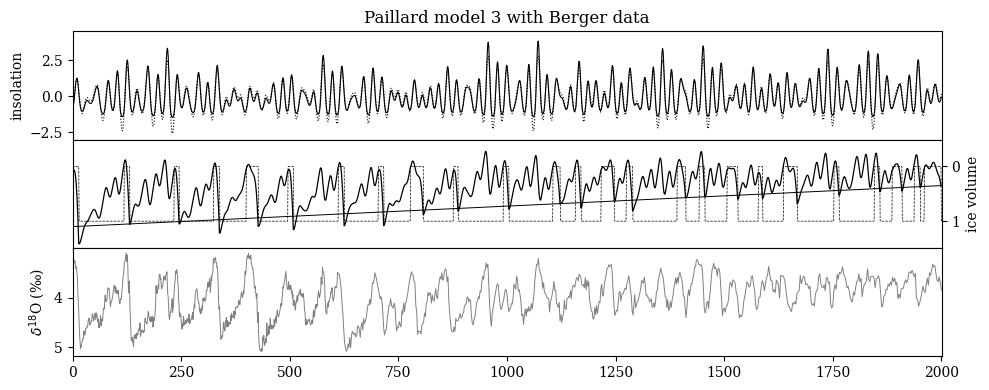

In [269]:
# Adding linear trend to insolation
for i in range(len(berger_inso_2000)):
    berger_inso_2000[len(berger_inso_2000) - 1 - i] += i * 0.003

# Normalizing insolation data
berger_inso_2000n = normalize(berger_inso_2000)

# Calculating and normalizing forcing data
F_data3 = f(berger_inso_2000n, a = 1)
F_data3 = normalize(F_data3)

Vmax = np.linspace(0.35, 1.1, len(berger_time_2000))

init_state = 0; v0 = 0.35; i0=-0.75; i1=0
ice_vol_arr, state_arr = paillard_model3(berger_inso_2000n, init_state, v0, Vmax, i0, i1)

# Creating array to hold the vRs for the simulation
vR = np.array([1,1,0])
vR_arr = vR[state_arr]

# Plotting with flipped time as is customary in climate physics
plt.rcParams['figure.figsize'] = (10,4)
gs = dict(hspace=0)
fig, axs = plt.subplots(3, 1, sharex=True, gridspec_kw = gs)
axs[0].plot(-berger_time_2000, F_data3, 'k')
axs[0].plot(-berger_time_2000, berger_inso_2000n, 'k:', lw = 0.8)
axs[0].set_xlim(0, len(berger_inso_2000n))
axs[0].set_ylim(-3, 4.5)
axs[0].set_ylabel('insolation')
axs[0].set_title('Paillard model 3 with Berger data')

axs[1].plot(-berger_time_2000, Vmax, 'k', lw=0.7, label='$v_{max}$')
axs[1].plot(-berger_time_2000, vR_arr, 'k--', lw = 0.5, label = '$v_R$')
axs[1].plot(-berger_time_2000, ice_vol_arr, 'k', lw = 0.9, label = 'ice volume')
axs[1].yaxis.set_label_position("right")
axs[1].yaxis.tick_right()
axs[1].set_ylim(-0.49, 1.49)
axs[1].set_ylim(axs[1].get_ylim()[::-1])
axs[1].set_ylabel('ice volume')
axs[1].set_xlabel('time before present [kyr]')

axs[2].plot(-LR04_time_2000, LR04_iso_2000, 'grey', lw=0.7, label='LR04')
axs[2].set_ylabel('$\delta^{18}$O (‰)')
axs[2].set_ylim(axs[2].get_ylim()[::-1])

fig.tight_layout()
fig.savefig('paillard_model3_berger.png', dpi=300)

1 1.0
600 2.0
1050 2.5
1650 5.0


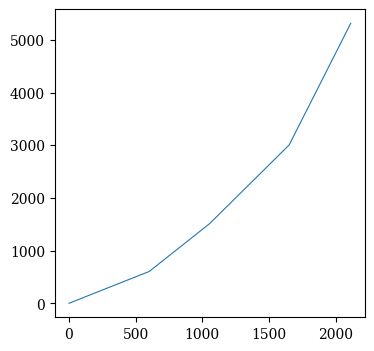

In [270]:
plt.rcParams['figure.figsize'] = (4,4)
LR04_dtime = np.diff(-LR04_time)

W = np.where(np.diff(-LR04_time))
plt.plot(-LR04_time[W])

for i in range(1, len(LR04_dtime)):
    if LR04_dtime[i] != LR04_dtime[i-1] or i == 1:
        print(i, LR04_dtime[i])

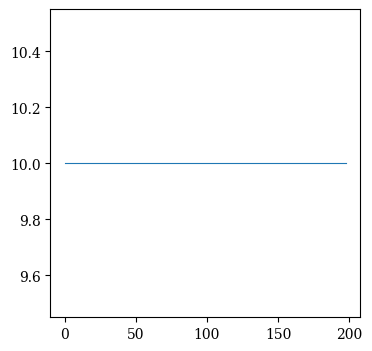

In [271]:
LR04_time_alt = np.concatenate((LR04_time[:600][::10], LR04_time[600:1050][::5], LR04_time[1050:1650][::4]))
LR04_iso_alt = np.concatenate((LR04_iso[:600][::10], LR04_iso[600:1050][::5], LR04_iso[1050:1650][::4]))
LR04_norm_alt = normalize(LR04_iso_alt)
LR04_norm_alt = LR04_norm_alt[:len(ice_vol_arr)//10]
LR04_time_alt = LR04_time_alt[:len(ice_vol_arr)//10]
plt.plot(np.diff(-LR04_time_alt))

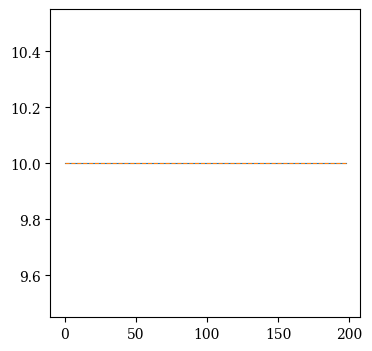

In [272]:
plt.plot(np.diff(-LR04_time_alt))
plt.plot(np.diff(berger_time[::10][:len(LR04_time_alt)]), ls='--')

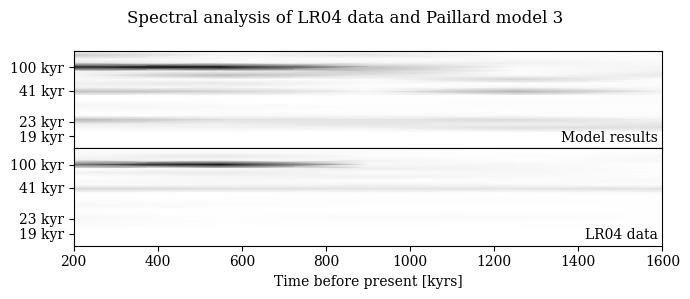

In [273]:
from scipy.signal import spectrogram
sig1 = LR04_norm_alt
sig2 = ice_vol_arr[::-1][::10]

fs = 1/10
windowsize = 40
f1, t1, Sxx1 = spectrogram(sig1, fs, nperseg = windowsize)
f2, t2, Sxx2 = spectrogram(sig2, fs, nperseg = windowsize)

gs = dict(hspace = 0, wspace=0)
fig, axs = plt.subplots(2, 1, figsize = (7, 3), sharex=True, gridspec_kw=gs)

fig.suptitle('Spectral analysis of LR04 data and Paillard model 3')

axs[0].set_title('Model results ', loc='right', y = -0.02, fontsize = 10)
axs[0].pcolormesh(t2, f2, Sxx2, cmap='Greys', shading = 'gouraud')
# axs[0].set_ylabel('Freq [1/kyr]')
# axs[0].set_xlabel('time before present [kyrs]')
yticks = (1/100, 1/41, 1/23, 1/19)
ylabels = ['100 kyr', '41 kyr', '23 kyr', '19 kyr']
axs[0].set_yticks(yticks, ylabels)
axs[0].set_ylim(0.06, 0)

axs[1].set_title('LR04 data ', loc='right', y = -0.02, fontsize = 10)
axs[1].pcolormesh(t1, f1, Sxx1, cmap='Greys', shading = 'gouraud')
# axs[1].set_ylabel('Freq [1/kyr]')
axs[1].set_xlabel('Time before present [kyrs]')
yticks = (1/100, 1/41, 1/23, 1/19)
ylabels = ['100 kyr', '41 kyr', '23 kyr', '19 kyr']
axs[1].set_yticks(yticks, ylabels)
axs[1].set_ylim(0.06, 0)

fig.tight_layout()
fig.savefig('spec_analysis.png', dpi=300)

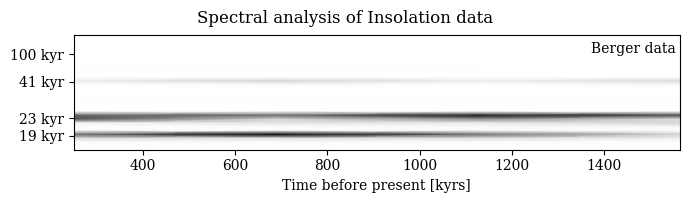

In [274]:
from scipy.signal import spectrogram
sig3 = berger_inso_2000n

fs = 1
windowsize = 500
f3, t3, Sxx3 = spectrogram(sig3, fs, nperseg = windowsize)

gs = dict(hspace = 0, wspace=0)
fig, ax = plt.subplots(1, 1, figsize = (7, 2.2), sharex=True, gridspec_kw=gs)

fig.suptitle('Spectral analysis of Insolation data', y = 0.9)

ax.set_title('Berger data ', loc='right', y = 0.77, fontsize = 10)
ax.pcolormesh(t3, f3, Sxx3, cmap='Greys', shading = 'gouraud')
# ax.set_ylabel('Freq [1/kyr]')
ax.set_xlabel('Time before present [kyrs]')
yticks = (1/100, 1/41, 1/23, 1/19)
ylabels = ['100 kyr', '41 kyr', '23 kyr', '19 kyr']
ax.set_yticks(yticks, ylabels)
ax.set_ylim(0.06, 0)

fig.tight_layout()
fig.savefig('spec_analysis_inso.png', dpi=300)

C:\Users\carla\AppData\Local\Temp\ipykernel_11844\1213048431.py:39: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


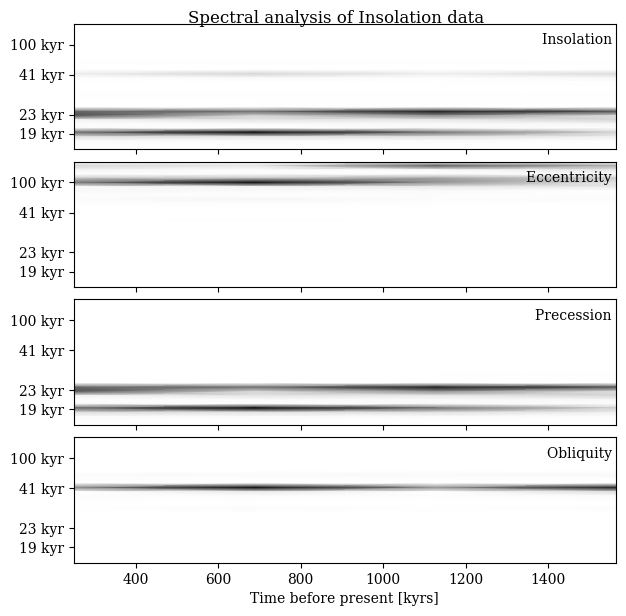

In [279]:
from scipy.signal import spectrogram
berger_ecce_2000n = normalize(berger_ecce_2000)
berger_prec_2000n = normalize(berger_prec_2000)
berger_obli_2000n = normalize(berger_obli_2000)
sig1 = berger_inso_2000n
sig2 = berger_ecce_2000n
sig3 = berger_prec_2000n
sig4 = berger_obli_2000n

fs = 1
windowsize = 500
f1, t1, Sxx1 = spectrogram(sig1, fs, nperseg = windowsize)
f2, t2, Sxx2 = spectrogram(sig2, fs, nperseg = windowsize)
f3, t3, Sxx3 = spectrogram(sig3, fs, nperseg = windowsize)
f4, t4, Sxx4 = spectrogram(sig4, fs, nperseg = windowsize)

gs = dict(hspace = 0.1, wspace=0)
fig, ax = plt.subplots(4, 1, figsize = (7,7), sharex=True, sharey=True, gridspec_kw=gs)

fig.suptitle('Spectral analysis of Insolation data', y = 0.9)

ax[0].set_title('Insolation ', loc='right', y = 0.77, fontsize = 10)
ax[0].pcolormesh(t1, f1, Sxx1, cmap='Greys', shading = 'gouraud')
yticks = (1/100, 1/41, 1/23, 1/19)
ylabels = ['100 kyr', '41 kyr', '23 kyr', '19 kyr']
ax[0].set_yticks(yticks, ylabels)
ax[0].set_ylim(0.06, 0)

ax[1].set_title('Eccentricity ', loc='right', y = 0.77, fontsize = 10)
ax[1].pcolormesh(t2, f2, Sxx2, cmap='Greys', shading = 'gouraud')

ax[2].set_title('Precession ', loc='right', y = 0.77, fontsize = 10)
ax[2].pcolormesh(t3, f3, Sxx3, cmap='Greys', shading = 'gouraud')

ax[3].set_title('Obliquity ', loc='right', y = 0.77, fontsize = 10)
ax[3].pcolormesh(t4, f4, Sxx4, cmap='Greys', shading = 'gouraud')
ax[3].set_xlabel('Time before present [kyrs]')

fig.tight_layout()
fig.savefig('spec_analysis_inso.png', dpi=300)